In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt 

In [2]:
def read_file(filename, encode = 'UTF-8'):
    """
    Read the text file with the given filename;
    return a list of the words of text in the file; ignore punctuations.
    also returns the longest word length in the file.
    """
    punctuation_set = set(u'''_—＄％＃＆:#$&!),.:;?]}¢'"、。〉》」』】〕〗〞︰︱︳﹐､﹒
    ﹔﹕﹖﹗﹚﹜﹞！），．：；？｜｝︴︶︸︺︼︾﹀﹂﹄﹏､～￠
    々‖•·ˇˉ―--′’”([{£¥'"‵〈《「『【〔〖（［｛￡￥〝︵︷︹︻
    ︽︿﹁﹃﹙﹛﹝（｛“‘-—_…''')
    num = 0
    word_list = []
    with open(filename, "r", encoding = encode) as file:
        for line in file:
            l = line.split()
            for word in l:
                new_word = ''
                ch_list = list(word)
                for c in ch_list:
                    if c not in punctuation_set and not c == "_":
                        new_word = new_word + c
                if not len(new_word) == 0: 
                    word_list.append(word)
                    if len(word) > num:
                        num = len(word)
                    
    print("Read file successfully!")
    return word_list, num
    

In [3]:
def count_frequency(word_list):
    """
    Input: a list containing words or characters
    Return: a dictionary mapping words to frequency.
    """
    D = {}
    for new_word in word_list:
        if new_word in D:
            D[new_word] = D[new_word]+1
        else:
            D[new_word] = 1
    return D

In [4]:
def decide_seq_order(word_list):
    """
    Input: a list containing words or characters
    Return: a dictionary mapping each word to its sequential number, which is decided by the order it 
            first appears in the word_list.
            
            And a list containg non-repetitive words, each in the order it first appears in word_list.
    """
    D = {}
    another_list = []
    for word in word_list:
        if word not in another_list:
            another_list.append(word)
    for num in range(len(another_list)):
        D[another_list[num]] = num + 1
    
    return D, another_list

In [5]:
def transfrom_wordlist_into_charlist(word_list):
    """Divide each words in the word_list into characters, order reserved.
    Input: a list containing words
    Return: a list containg char, 
    """
    char_list = []
    for word in word_list:
        char_list.extend(list(word))
        
    return char_list

In [6]:
def produce_data_frame(word_list, word_freq, word_seq,varibleTitle ):
    word_list = list(set(word_list))
    data = {}
    word_seq_list = []
    word_freq_list = []
    
    for word in word_list:
        word_freq_list.append(word_freq[word])
        word_seq_list.append(word_seq[word])
    
    first = varibleTitle 
    second = varibleTitle + "SeqOrder"
    third = varibleTitle + "Freq"
    forth = varibleTitle + "Rank"
    
    data[first] = word_list
    data[second] = word_seq_list
    data[third] = word_freq_list  
    
    dataFrame = pd.DataFrame(data)
    dataFrame = dataFrame.sort_values([third, second],ascending = [False,True])
    rank = np.array(list(range(1,len(dataFrame)+1))) 
    dataFrame[forth] = rank
    column_list = [first, third, forth, second]
    dataFrame = dataFrame[column_list]
    dataFrame = dataFrame.reset_index(drop=True)
    return dataFrame
            
            

In [7]:
def produce_wordRank_charRank_frame(pd_word,pd_char,longest):
    
    D = {}
    
    char_array = pd_char["char"]
    char_rank = {}
    
    for i in range(len(pd_char)):
        char_rank[char_array[i]] = i + 1 
    
    for i in range(longest):
        D[i] = []
    
    word_array = pd_word["word"]
    
    for word in word_array:
        for i in range(len(word)):
            D[i].append(int(char_rank[word[i]]))
        
        if len(word) < longest:
            for j in range(len(word),longest):
                D[j].append(np.nan)
    
    for k in range(longest):
        feature = str(k) + "th"+"_char_rank"
        pd_word[feature] = np.array(D[k])
    
    return pd_word  

In [8]:
def main(file_name, encode = "UTF-8"):
    l, longest_l = read_file(file_name,encode)
    word_freq = count_frequency(l)
    print("Successfully count word freqency!")
    word_seq, word_list = decide_seq_order(l)
    c_list = transfrom_wordlist_into_charlist(l)
    char_seq, char_list = decide_seq_order(c_list)
    char_freq = count_frequency(c_list)
    print("Successfully count char freqency!")
    pd_word= produce_data_frame(word_list, word_freq, word_seq,"word")
    another_word = pd_word.copy()
    pd_char= produce_data_frame(char_list, char_freq, char_seq,"char")
    data_frame = produce_wordRank_charRank_frame(pd_word,pd_char,longest_l)
    print("Successfully build data frames!")
    return data_frame, pd_char, another_word

In [9]:
def draw(data_frame,feature = ["0th_char_rank","wordFreq"], x_label = "wordRank", y_label = "charRank",  
         title = "fake2Viet3"):
    
    feature1 = feature[0]
    feature2 = feature[1]
    
    zeroth_char_rank = data_frame[feature1]
    word_freq = data_frame[feature2]
    
    plt.figure(1)
    plt.ylabel(feature1)
    plt.xlabel(x_label)
    plt.title(title)
    plt.plot(zeroth_char_rank,'ro')
    
    plt.figure(2)
    plt.ylabel(feature2)
    plt.xlabel(x_label)
    plt.title(title + " log-log")
    plt.yscale('log')
    plt.xscale('log')
    plt.plot(word_freq,'ro')
    
    return None
        
   

In [10]:
def check_const_ratio(data, feature= "wordRank", criteria = "wordFreq",max_range = 200):
    """Calculate the ratios of date in the feature column
    
    Parameters:
    ---
    data: numpy.DataFrame
        a data frame contains information about word stats.
    
    feature: string
        feature to be oberved
    
    max_range: int 
        the maximum lenth of wordRank to be covered
                
        
    
    Returns
    ---
    new: numpy.array
        a numpy array containing rotios of the data satisfying Ming's criteria in the feature column.
    
    """
    np_array = np.array([])
    
    for i in range(1,max_range):
        dd = data[data[criteria] == i]
        if dd.empty: break
        else:
            tmp = np.array(dd.tail(1)[feature])
            np_array = np.append(np_array,tmp)
        
    numer_array = np.append(np_array,[1])
    denom_array = np.append([1],np_array)
    new = numer_array / denom_array
    print(feature, " ratio: ",new[1:-1])
    print("std= ",new[1:-1].std())
    return new

### Analyse Vietnamese fake scripts to see if they are YYY.

NOTE: "fake2char_Viet3" means a 3-character Vietnamese script generated from a fake script with all words having 2 characters, et cetera.

Read file successfully!
Successfully count word freqency!
Successfully count char freqency!
Successfully build data frames!
wordRank  ratio:  [ 0.41599523  0.54160689  0.68211921  0.75728155  0.78205128  0.87868852
  0.83208955  0.86995516  0.91237113  0.92090395  0.9202454   0.92666667
  0.94244604  0.87022901  0.97368421  0.93693694  0.93269231  0.91752577
  0.94382022  0.96428571  0.92592593  0.94666667  0.97183099  0.95652174
  0.98484848  0.95384615  0.93548387  0.94827586  0.98181818  0.98148148
  0.9245283   0.93877551]
std=  0.125454793094


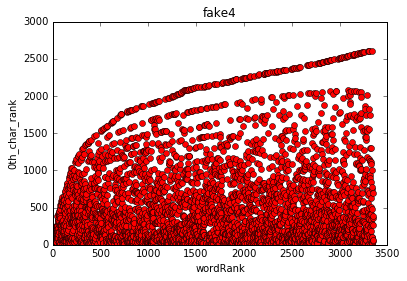

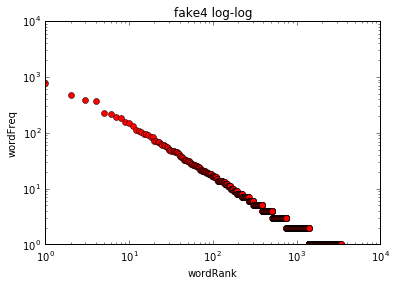

In [11]:
#encode = "UTF-16" #(1)
encode = "UTF-8"   #(2)
##if anything goes into trouble, use (1) instead of (2), and vise versa.
filename = "DEC10FAKE4.txt" #change filename when you want to get statictical information of another
##text file.
big, char, word = main(filename,encode) 
draw(big,title = "fake4")
arr = check_const_ratio(word,feature= "wordRank", criteria = "wordFreq",max_range = 200)

In [12]:
print(big.to_string())

      word  wordFreq  wordRank  wordSeqOrder  0th_char_rank  1th_char_rank  2th_char_rank  3th_char_rank
0     林瓦夕能      1585         1             3              2              3              4              1
1     就求鄉陷       781         2            11              5              7              6              8
2     傷箱覺天       486         3             4             13             14             12             11
3     焦朋清搶       381         4             6             19             21             17             20
4     加規一碟       367         5            63             16             22              9             23
5     判順得克       226         6            35             37             35             15             30
6     及不息搬       220         7            17             25             10             28             39
7     下機炮已       196         8            95             26             32             45             44
8     得人潔點       188         9            37           

Read file successfully!
Successfully count word freqency!
Successfully count char freqency!
Successfully build data frames!
wordRank  ratio:  [ 0.41718704  0.56379187  0.63969659  0.73715415  0.79624665  0.86531987
  0.81712062  0.9047619   0.88947368  0.87573964  0.92567568  0.9270073
  0.8976378   0.96491228  0.93636364  0.91262136  0.9787234   0.92391304
  0.94117647  0.925       0.95945946  0.97183099  0.97101449  0.92537313
  0.96774194  0.98333333]
std=  0.135670754968


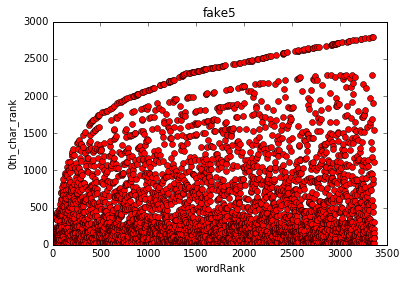

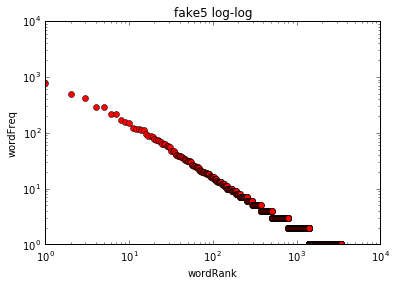

In [13]:
#encode = "UTF-16" #(1)
encode = "UTF-8"   #(2)
##if anything goes into trouble, use (1) instead of (2), and vise versa.
filename = "DEC10FAKE5.txt" #change filename when you want to get statictical information of another
##text file.
big, char, word = main(filename,encode) 
draw(big,title = "fake5")
arr = check_const_ratio(word,feature= "wordRank", criteria = "wordFreq",max_range = 200)

In [14]:
print(big.to_string())

       word  wordFreq  wordRank  wordSeqOrder  0th_char_rank  1th_char_rank  2th_char_rank  3th_char_rank  4th_char_rank
0     目過況敬峭      1592         1             4              2              1              3              4              5
1     塗嚮大杜祭       773         2             1             10             12              6              9             11
2     供月有好氏       507         3             7             19             18              8              7             20
3     心售靈來利       428         4            35             13             23             24             16             14
4     進到東燒好       296         5           102             21             15             29             32              7
5     乞閏已出號       291         6           133             36             37             35             17             31
6     文鴉０正鄰       220         7             8             30             51             49             25             45
7     仔莉去徵總       216         8 

Read file successfully!
Successfully count word freqency!
Successfully count char freqency!
Successfully build data frames!
wordRank  ratio:  [ 0.42427885  0.56090652  0.66161616  0.76908397  0.81637717  0.84802432
  0.86021505  0.85833333  0.88349515  0.87362637  0.87421384  0.86330935
  0.95833333  0.93913043  0.9537037   0.93203883  0.91666667  0.96590909
  0.96470588  0.97560976  0.925       0.93243243  0.95652174  0.93939394
  0.9516129   0.96610169  0.98245614  0.96428571  0.96296296  0.96153846]
std=  0.126013204863


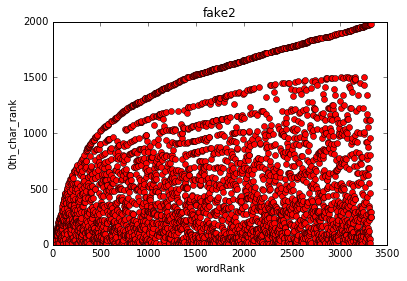

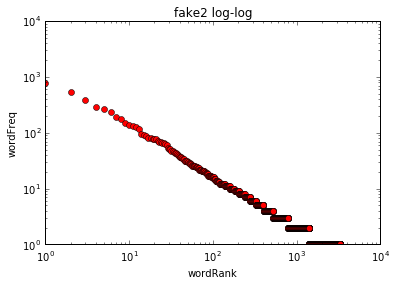

In [15]:
#encode = "UTF-16" #(1)
encode = "UTF-8"   #(2)
##if anything goes into trouble, use (1) instead of (2), and vise versa.
filename = "DEC10FAKE2.txt" #change filename when you want to get statictical information of another
##text file.
big, char, word = main(filename,encode) 
draw(big,title = "fake2")
arr = check_const_ratio(word,feature= "wordRank", criteria = "wordFreq",max_range = 200)


In [16]:
print(big.to_string())

     word  wordFreq  wordRank  wordSeqOrder  0th_char_rank  1th_char_rank
0      鮮興      1550         1             4              1              2
1      旗副       797         2             1              4              3
2      途地       537         3             8              6              5
3      貴增       392         4             3              9              8
4      有自       293         5            39             12             10
5      貨定       266         6            30             14             13
6      軍多       241         7            25             17              7
7      煤逃       189         8            74             22             19
8      到業       174         9            68             15             21
9      習接       149        10            64             26             24
10     沒多       140        11            69             27              7
11     抱輸       132        12            96             30             29
12     嗦調       127        13         

In [15]:
writer = pd.ExcelWriter('output.xlsx')
big.to_excel(writer,'Sheet1')
word.to_excel(writer,'Sheet2')
char.to_excel(writer,'Sheet3')
writer.save()

Read file successfully!
Successfully count word freqency!
Successfully count char freqency!
Successfully build data frames!
wordRank  ratio:  [ 0.42516907  0.53526971  0.67829457  0.71238095  0.78074866  0.84246575
  0.8902439   0.8630137   0.87301587  0.92121212  0.89473684  0.94852941
  0.92248062  0.95798319  0.92105263  0.95238095  0.95        0.92631579
  0.93181818  0.97560976  0.9625      0.94805195  0.93150685  0.92647059
  0.98412698  0.96774194]
std=  0.135694773419


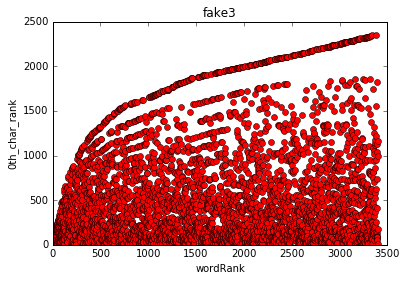

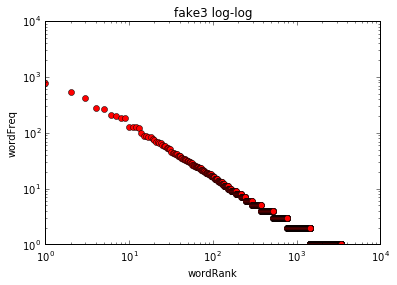

In [17]:
#encode = "UTF-16" #(1)
encode = "UTF-8"   #(2)
##if anything goes into trouble, use (1) instead of (2), and vise versa.
filename = "DEC10FAKE3.txt" #change filename when you want to get statictical information of another
##text file.
big, char, word = main(filename,encode) 
draw(big,title = "fake3")
arr = check_const_ratio(word,feature= "wordRank", criteria = "wordFreq",max_range = 200)

In [18]:
print(big.to_string())

     word  wordFreq  wordRank  wordSeqOrder  0th_char_rank  1th_char_rank  2th_char_rank
0     蛀募孓      1578         1             1              1              2              3
1     巨額學       786         2             2              5              6              4
2     因亂魂       546         3            54              9              8             10
3     代來螺       414         4            29              7             11             12
4     代術劉       283         5            22              7             16             17
5     役足亨       264         6            14             19             18             20
6     幅同南       213         7            70             26             22             13
7     培噯在       204         8            31             28             29             24
8     聲兌查       182         9            61             31             35             34
9     攻爽詞       182        10            94             25             36             32
10    南體裸       130  

In [23]:
big["wordFreq"].sum()

15000